In [1]:
import pandas as pd

In [2]:
## Data Ingestions Step
df=pd.read_csv('data/gemstone.csv')

In [3]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
### No missing values are present

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
#id is a unique value, so it is unimportant, we can drop it
df=df.drop(labels=['id'],axis=1)

In [8]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [9]:
##check for duplicated records
df.duplicated().sum()

0

In [10]:
## segregate numerical and categorical columns
numerical_columns=df.select_dtypes(exclude='object').columns
categorical_columns=df.select_dtypes(include='object').columns

In [11]:
print("Numerical columns :",numerical_columns)
print("Categorical columns :",categorical_columns)

Numerical columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [12]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
print(df['cut'].unique())
print(df['cut'].nunique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
5


In [14]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [15]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [16]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

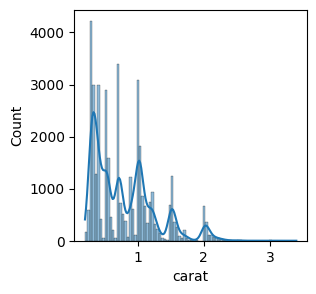

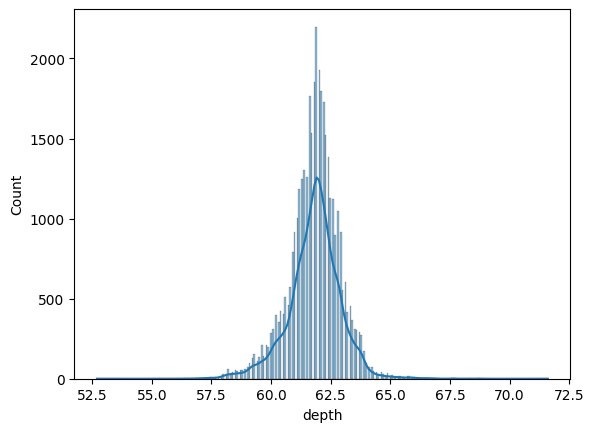

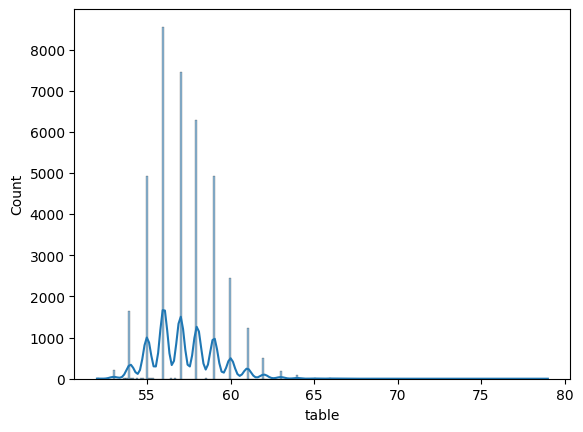

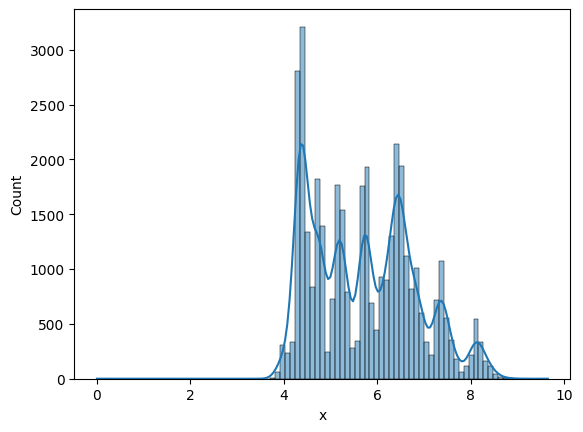

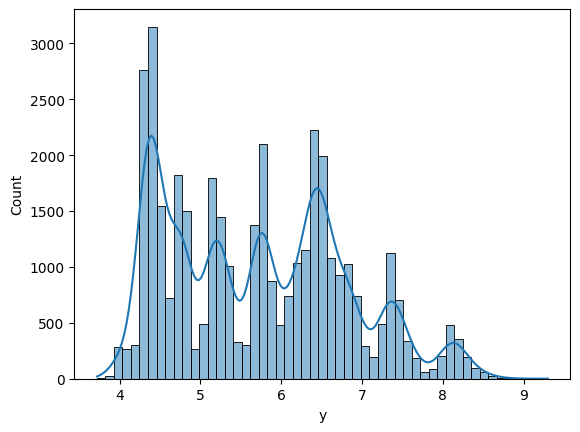

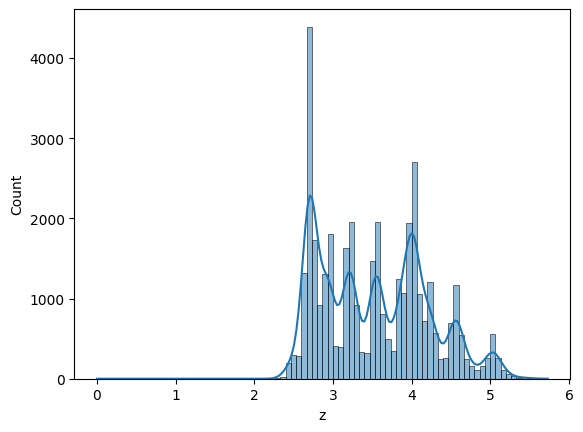

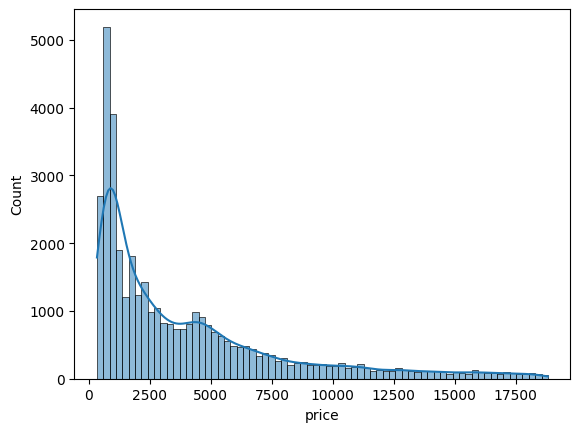

In [17]:
# we will plot the numeric features and see their distribution
#we are taking only a sample of 20% data

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
x=1
for i in numerical_columns:
    sns.histplot(data=df[numerical_columns].sample(frac=0.2),x=i,kde=True)
    print('\n')
    plt.show()

<Axes: xlabel='cut', ylabel='count'>

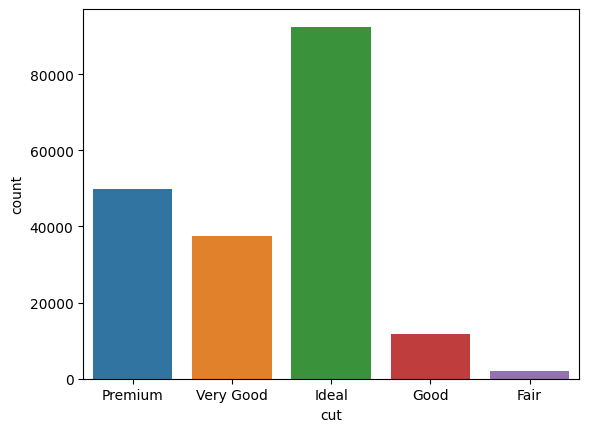

In [18]:
sns.countplot(data=df[categorical_columns].sample(frac=0.1),x=df['cut'])

<Axes: >

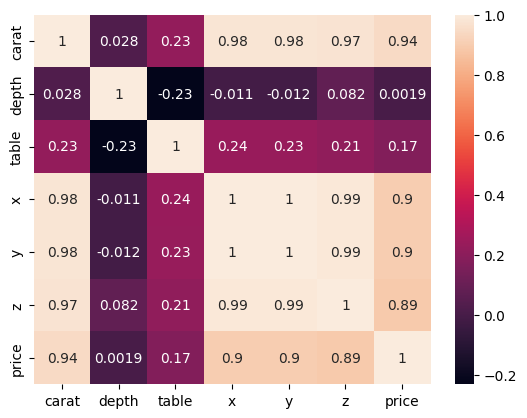

In [19]:
## correlation - to find corr between 2 columns
# if there is v high corr, we can drop the columns
# x and y, is 1, so we can drop it, cos they are 100% correlated
# we can drop x,y,z becos we already have carat
#huge correlation between independent features = multi-co-linearity

# we see depth is hardly correlated with price, it wont have much effect, so we can drop the depth

sns.heatmap(df.corr(numeric_only=True),annot=True)

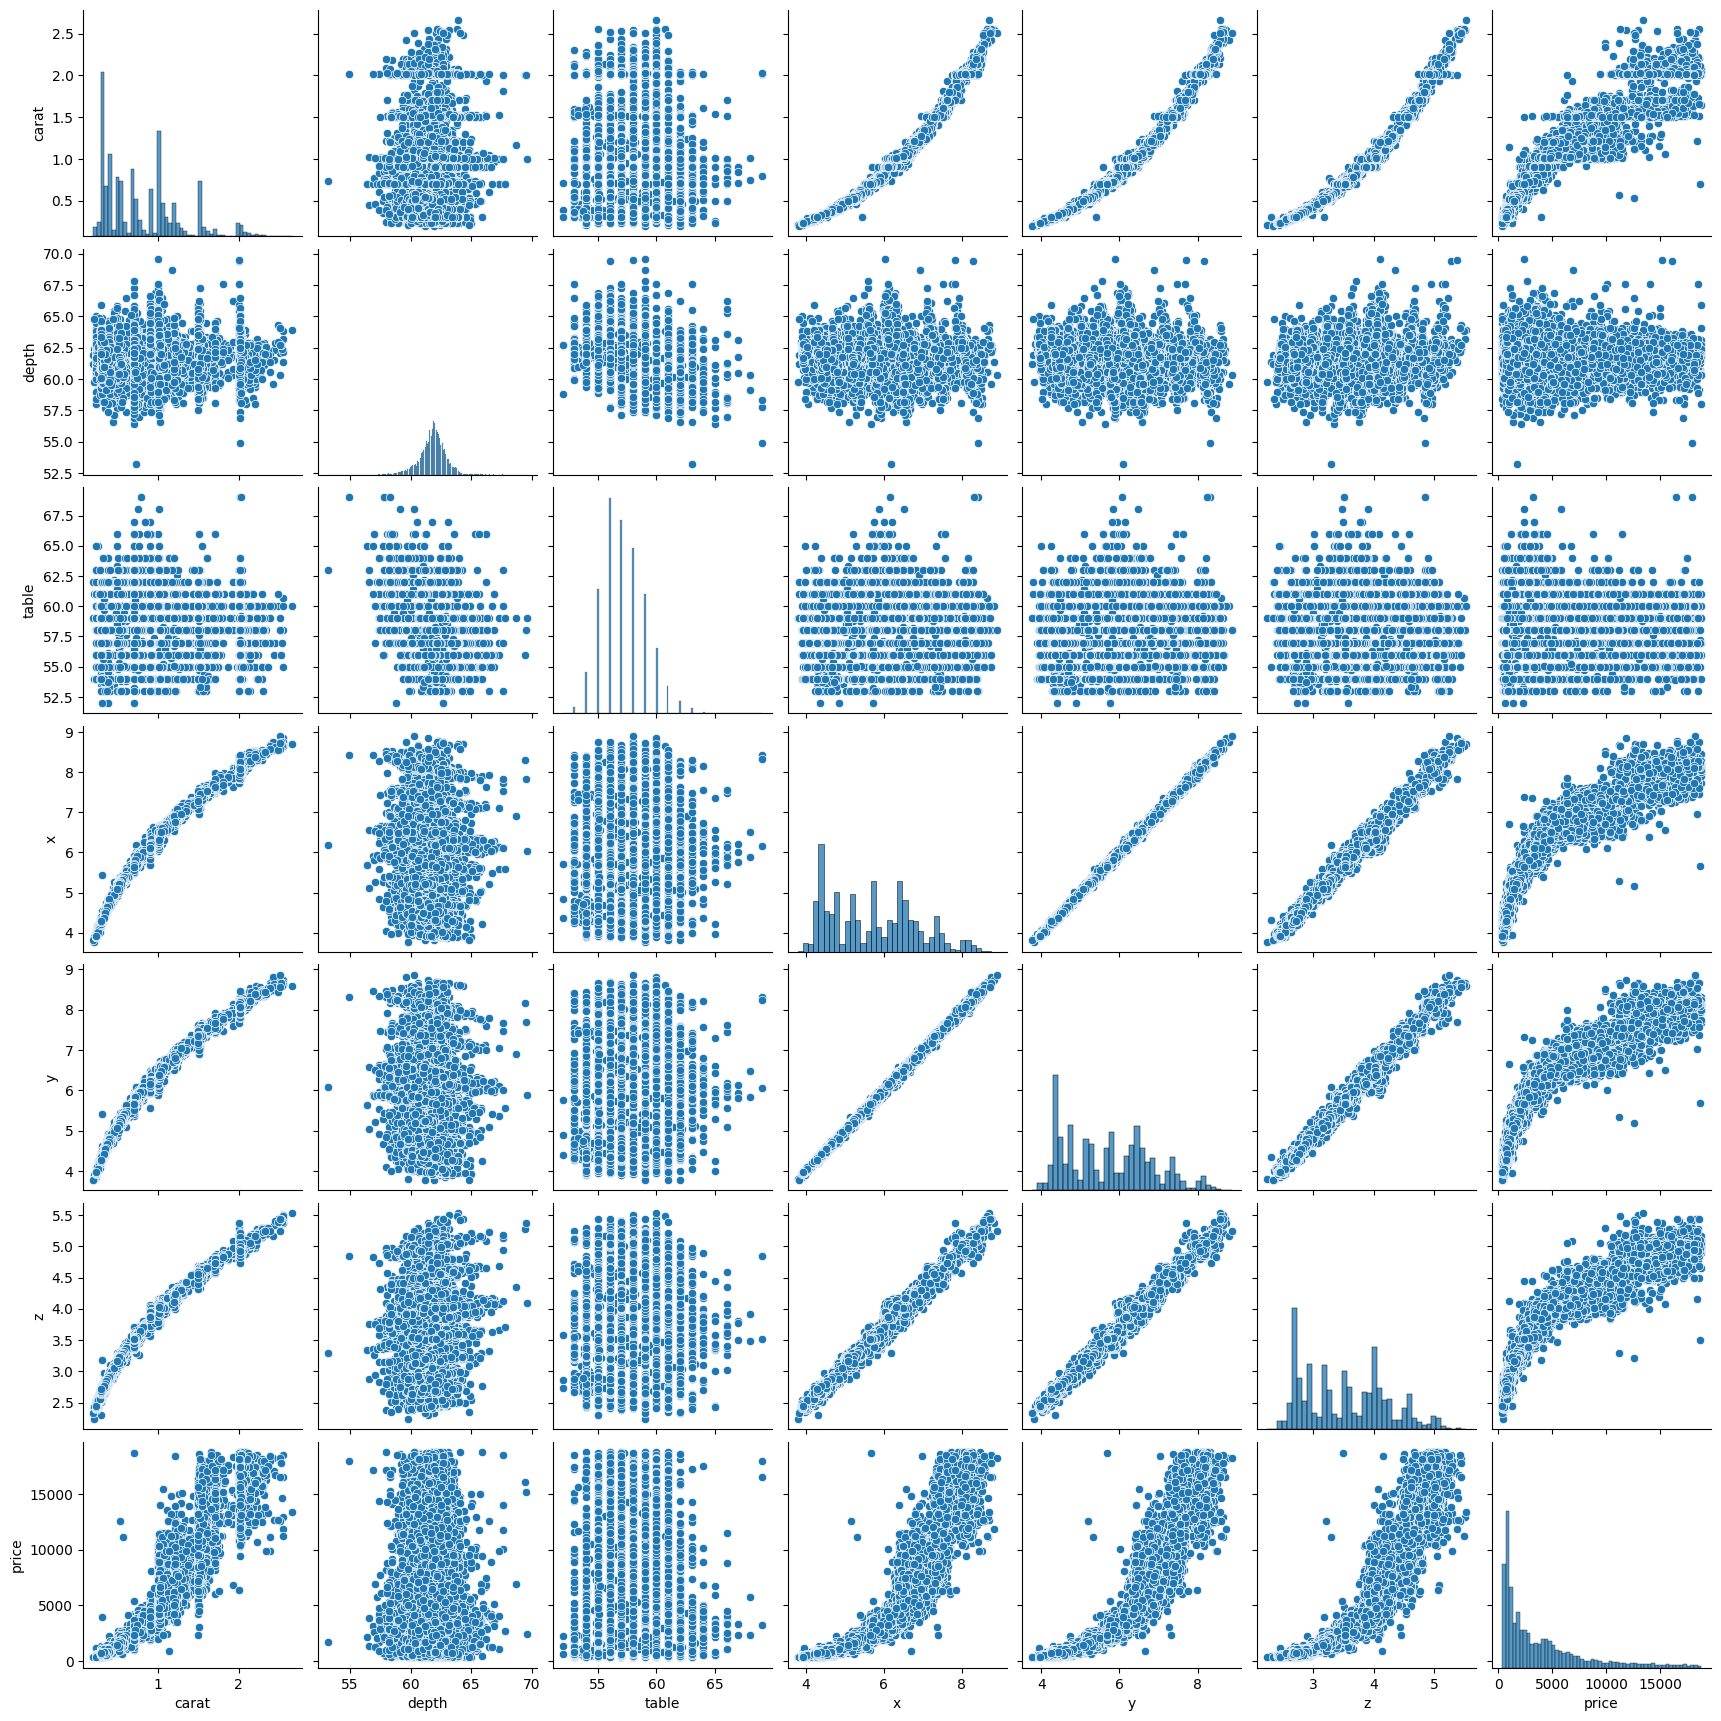

In [20]:
## we see there is a positive correlation all the time
sns.pairplot(df.sample(frac=0.1))

In [21]:
#now we need to convert these ordinal values into numeric
#here we need domain expert help to help us assign the values
#more the rank, better the value

df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [22]:
# we can map the values for the ordinal values 

cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
clarity_map={'I1':1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map={'D':1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [23]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [24]:
## so all the features are converted now
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
